### Online Shopper's Intention
#### SECTION 2 - MACHINE LEARNING MODEL BUILDING

***The goal of this section is to build and selecting the best model to predict Purchased or not Purchased customers in order to help retain customers.*** 

In order to achieve this goal, we will be focusing on searching the best model using some conditions below : 

- First, we split the data into 80% Train data and then we split the data into 90% Train data.


- Then we scale the data so that the're having the same scale.


- In each attempts we will be conducting the Logistic Regression, Random Forrest Classifier and KNearest Neighbors Models.


- Also we try to do the hyperparameter tuning then compare it between it's default models.


- In last part we compare the result between models to achieve our goals.

### IMPORT LIBRARIES

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.model_selection import learning_curve, ValidationCurve
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn import metrics

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [112]:
df = pd.read_csv('Final Project Clean.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data Preprocessing

Text(0.5, 1.0, 'PageValues')

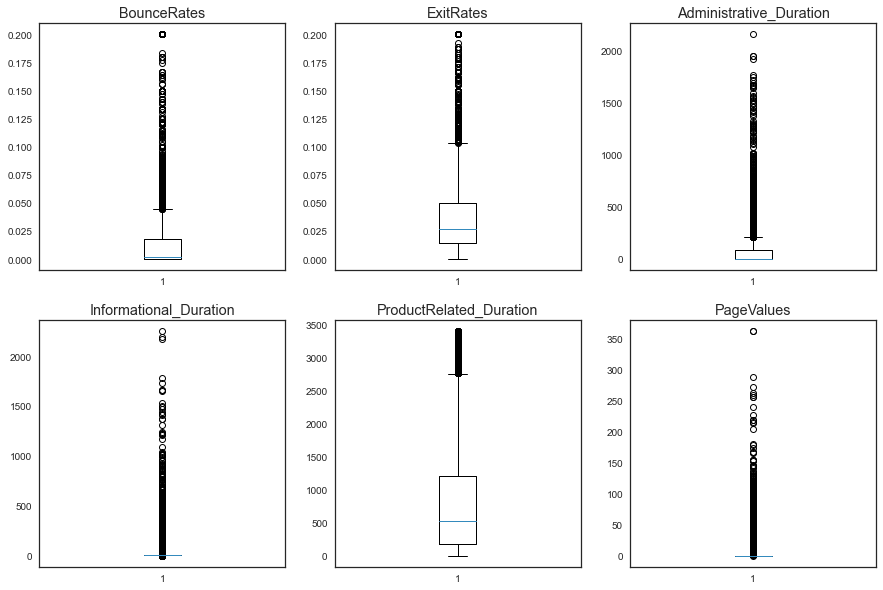

In [113]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(df['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(df['PageValues'])
ax.set_title('PageValues')

In [114]:
numerics =['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerics:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

Text(0.5, 1.0, 'ProductRelated_Duration')

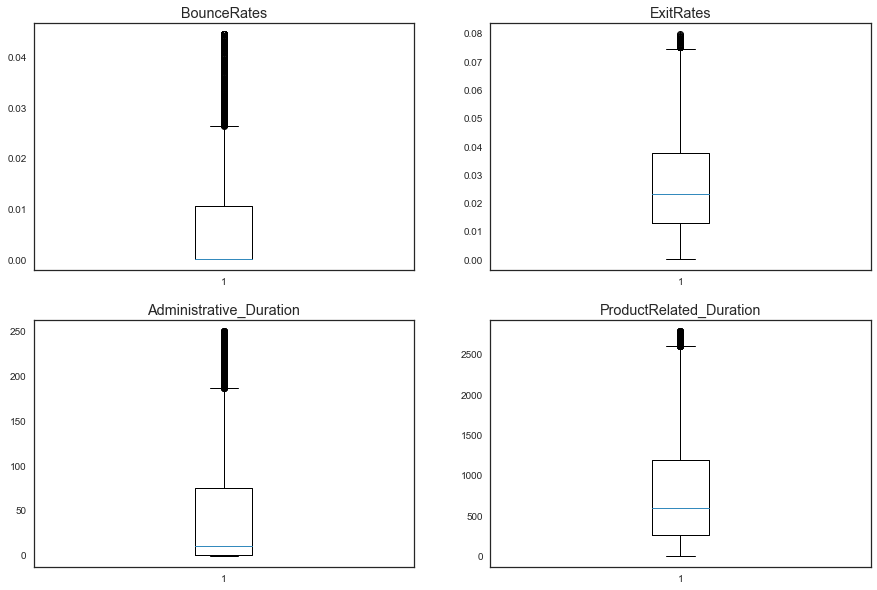

In [115]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(222)
plt.boxplot(df['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(223)
plt.boxplot(df['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(224)
plt.boxplot(df['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

### One Hot and Label Encoding

In [116]:
# one hot encoding 

data = pd.get_dummies(df)

data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [117]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
df['Revenue'] = laben.fit_transform(data['Revenue'])
df['Revenue'].value_counts()

0    7068
1    1348
Name: Revenue, dtype: int64

In [118]:
# label encoding of Weekend

from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
df['Weekend'] = laben.fit_transform(data['Weekend'])
df['Weekend'].value_counts()

0    6387
1    2029
Name: Weekend, dtype: int64

In [119]:
df.loc[df['SpecialDay'] > 0.4, 'SpecialDay'] = 1
df.loc[df['SpecialDay'] <= 0.4, 'SpecialDay'] = 0
df['SpecialDay'].value_counts()

0.0    7906
1.0     510
Name: SpecialDay, dtype: int64

In [120]:
df['SpecialDay']=df['SpecialDay'].astype('bool')
df['SpecialDay'].value_counts()

False    7906
True      510
Name: SpecialDay, dtype: int64

In [121]:
# label encoding of SpecialDay
laben = LabelEncoder()
df['SpecialDay'] = laben.fit_transform(data['SpecialDay'])
df['SpecialDay'].value_counts()

0    7640
3     226
4     190
2     146
1     120
5      94
Name: SpecialDay, dtype: int64

In [122]:
for cols in ['Administrative','Informational','ProductRelated','OperatingSystems','Browser',
             'Region','TrafficType','VisitorType']:
    df[cols] = df[cols].astype('category')

In [123]:
df.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                    int64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                       int64
Revenue                       int64
dtype: object

In [124]:
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
variable_categories =['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


scaling = [col for col in df.columns if col not in variable_categories]


scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [125]:
df_scaled = pd.concat([df[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scaling]), columns=scaling)],
                    axis=1)
df_scaled.head(3)

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0,3,3,1,Feb,4,Returning_Visitor,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,0,19,0,2,2,1,Feb,3,Returning_Visitor,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,0,3,2,2,4,1,Feb,2,Returning_Visitor,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718


In [126]:
encoded_features=['Month','VisitorType']

df_label = df_scaled.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    df_label[col] = label_encoder.fit_transform(df_scaled[col])
    
df_label.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


In [127]:
df_label.dtypes

Weekend                       int64
Revenue                       int64
Administrative             category
Informational              category
ProductRelated             category
SpecialDay                    int64
OperatingSystems           category
Browser                    category
Region                     category
Month                         int64
TrafficType                category
VisitorType                   int64
Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
dtype: object

In [128]:
# getting dependent and independent variables

x = data
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (8416, 28)
Shape of y: (8416,)


In [129]:
df_80 = df_label.copy()

In [130]:
X = df_80.drop(columns = ['Revenue'])
y = df_80['Revenue'].values

In [131]:
X.head()

,Weekend,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


### FITTING MODEL

In [201]:
#Split train data 80%, test data 20%
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, random_state = 42)

#Model
LRG = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
DTC = DecisionTreeClassifier().fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)

### HYPERPARAMETER

> Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method. As mentioned, the tune process of Hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter version of each models.

In [133]:
# applying model with hyperparameter
LRG_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(X_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 10).fit(X_train, y_train)
DTC_best = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1).fit(X_train, y_train)
KNN_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 18).fit(X_train, y_train)

In [134]:
# train data
LRG_score_tr = LRG.score(X_train,y_train)
RFC_score_tr = RFC.score(X_train,y_train)
DTC_score_tr = DTC.score(X_train,y_train)
KNN_score_tr = KNN.score(X_train,y_train)
LRG_best_score_tr = LRG_best.score(X_train,y_train)
RFC_best_score_tr = RFC_best.score(X_train,y_train)
DTC_best_score_tr = DTC_best.score(X_train,y_train)
KNN_best_score_tr = KNN_best.score(X_train,y_train)

In [135]:
# test data
LRG_score = LRG.score(X_test,y_test)
RFC_score = RFC.score(X_test,y_test)
DTC_score = DTC.score(X_test,y_test)
KNN_score = KNN.score(X_test,y_test)
LRG_best_score = LRG_best.score(X_test,y_test)
RFC_best_score = RFC_best.score(X_test,y_test)
DTC_best_score = DTC_best.score(X_test,y_test)
KNN_best_score = KNN_best.score(X_test,y_test)

In [136]:
model80_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                    'Normal': [LRG_score_tr, RFC_score_tr, DTC_score_tr, KNN_score_tr], 
                                    'Hyper' : [LRG_best_score_tr, RFC_best_score_tr, DTC_best_score_tr, KNN_best_score_tr]})

In [137]:
model80_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG_score, RFC_score, DTC_score, KNN_score], 
                                   'Hyper' : [LRG_best_score, RFC_best_score, DTC_best_score, KNN_best_score]})

In [138]:
pd.concat([model80_train_score, model80_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.890969  0.873737
            1   RandomForest  1.000000  0.947267
            2   DecisionTree  1.000000  1.000000
            3    KNNeighbors  0.880125  0.849079
Test Score  0  LogRegression  0.899050  0.882423
            1   RandomForest  0.911520  0.907957
            2   DecisionTree  0.864014  0.862827
            3    KNNeighbors  0.862233  0.856295

> Seeing the test score result, we can see that our models indeed performed better using Hyperparameter, therefore we'll use hyperparameter model for our prediction. But before that, by comparing our Train and Test Scores we can see that maybe there are some overfitting in our data especially on Random Forest and Decision Tree method. So I'll try to check it with ***cross validation*** before we continue to the next step.

In [139]:
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state=0)
LRG_kfold = cross_val_score(LRG_best, X_train, y_train, cv = cv, scoring = 'accuracy')
RFC_kfold = cross_val_score(RFC_best, X_train, y_train, cv = cv, scoring = 'accuracy')
DTC_kfold = cross_val_score(DTC_best, X_train, y_train, cv = cv, scoring = 'accuracy')
KNN_kfold = cross_val_score(KNN_best, X_train, y_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG_kfold.tolist(),
              'RFC Kfold cross-val' : RFC_kfold.tolist(),
              'DTC kfold cross-val' : DTC_kfold.tolist(),
              'KNN Kfold cross-val' : KNN_kfold.tolist()})

,LRG Kfold cross-val,RFC Kfold cross-val,DTC kfold cross-val,KNN Kfold cross-val
0,0.872404,0.913947,0.864985,0.841246
1,0.869436,0.885757,0.870920,0.845697
2,0.881129,0.918276,0.857355,0.848440
3,0.878158,0.903418,0.866270,0.845468
4,0.876672,0.921248,0.860327,0.843982
5,0.866270,0.890045,0.873700,0.846954
6,0.866270,0.903418,0.869242,0.849926
7,0.876672,0.916790,0.861813,0.857355
8,0.878158,0.900446,0.851412,0.842496
9,0.876672,0.919762,0.878158,0.851412


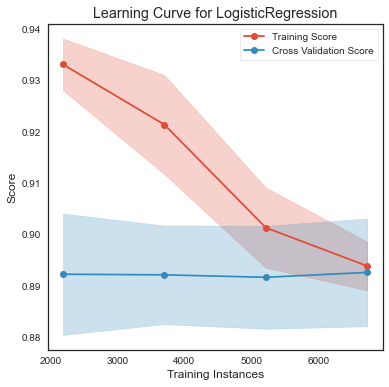

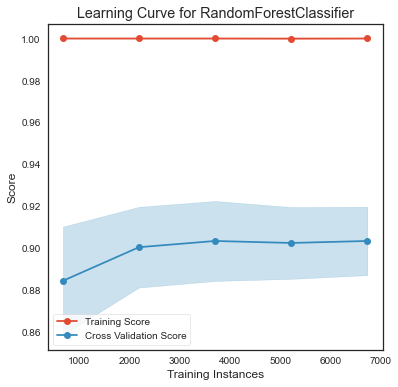

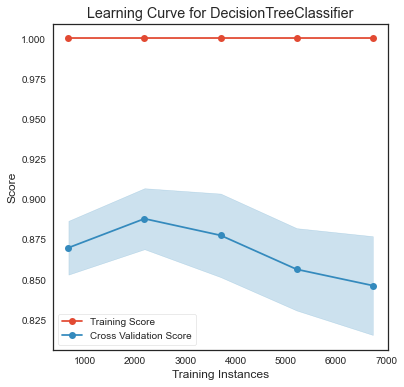

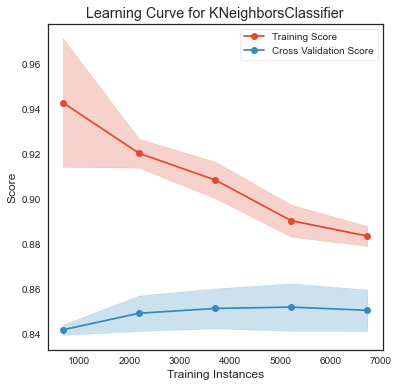

In [140]:
curve = [LRG, RFC, DTC, KNN]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

>These are the learning curve for train data, above are for default parameter, while below are for the hyperparameter tuned model.

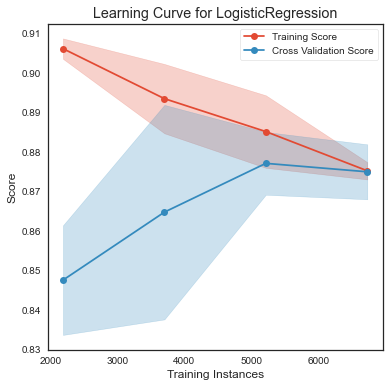

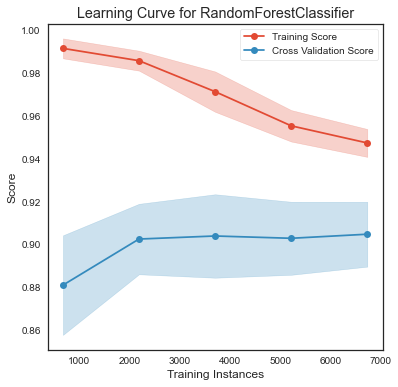

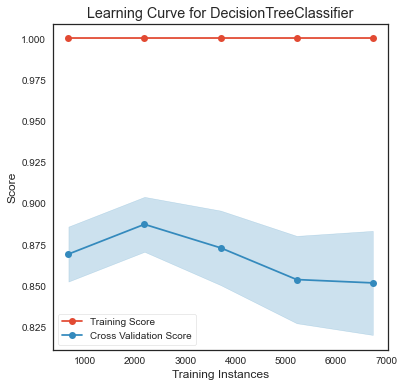

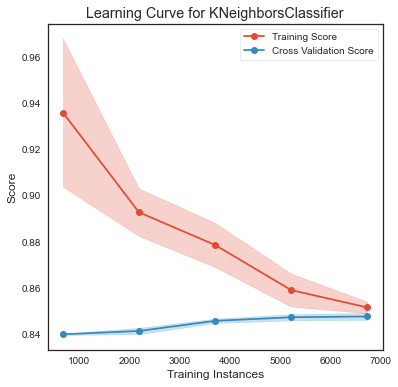

In [141]:
curve = [LRG_best, RFC_best, DTC_best, KNN_best]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

In [142]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree','KNNeighbors'], 
              'Normal': [LRG_score_tr, RFC_score_tr, DTC_score_tr, KNN_score_tr],
              'Kfold ': [LRG_kfold.mean(), RFC_kfold.mean(), DTC_kfold.mean(), KNN_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.890969,0.874184
1,RandomForest,1.000000,0.907311
2,DecisionTree,1.000000,0.865418
3,KNNeighbors,0.880125,0.847298


> So, by using 5 times cross validation to compare our previous score with the kfold score, it seems that we can see ovefitting on our Random Forest and Decision Tree model, while the other two are rather stable. But for now let's continue to next process, we will apply our model to predict the test data.

### PREDICT

In [143]:
#Logistic Regression
yp_LRG = LRG_best.predict(X_test)

#Random Forest
yp_RFC = RFC_best.predict(X_test)

#Decision Tree
yp_DTC = DTC_best.predict(X_test)

#KNNeighbors
yp_KNN = KNN_best.predict(X_test)

### MODEL PERFORMANCE EVALUATION

> Below, we will begin evaluating our models starting from Logistic Regression, then Random Forest, and lastly the KNN model.

### Logistic Regression

> In theory, Logistic Regression method uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output.

In [144]:
# evaluation matrix for LogisticRegression
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[1410,   16],
       [ 182,   76]])

In [163]:
labels = ['Not Income', 'Income']

              precision    recall  f1-score   support

  Not Income       0.89      0.99      0.93      1426
      Income       0.83      0.29      0.43       258

    accuracy                           0.88      1684
   macro avg       0.86      0.64      0.68      1684
weighted avg       0.88      0.88      0.86      1684



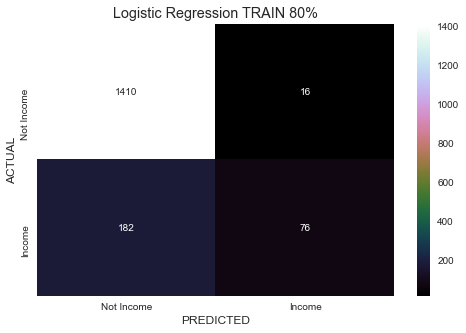

In [164]:
print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax, cmap = 'cubehelix')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Acually by seeing the data from the confusion matrix above, we can see that maybe our data is likely unbalanced. Therefore maybe in the end after comparing our result we can try to re-balance the data using oversampling or undersampling method. For now it's a good result and let's just focus on building the models. I also put the classification report into **report_LRG** so that in the summary section we can call it back and concatenate it with other reports.

In [165]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T

### Random Forest Classifier

> Moving on to the next model, Random forests. It's esentially are a learning method for classification, regression and other tasks that operate by constructing a multitude of Decision Trees. While Decision Tree is a tree based algorithm used to solve regression and classification problems. An inverted tree is framed which is branched off from a homogeneous probability distributed root node, to highly heterogeneous leaf nodes, for deriving the output. Random Forest models are actually better performed with unscaled data, so maybe after we've done the process, we'll do this model againts the best model we later get in this Machine Learning section.

In [148]:
# confusion matrix for RandomForestClassifier
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[1380,   46],
       [ 109,  149]])

              precision    recall  f1-score   support

  Not Income       0.93      0.97      0.95      1426
      Income       0.76      0.58      0.66       258

    accuracy                           0.91      1684
   macro avg       0.85      0.77      0.80      1684
weighted avg       0.90      0.91      0.90      1684



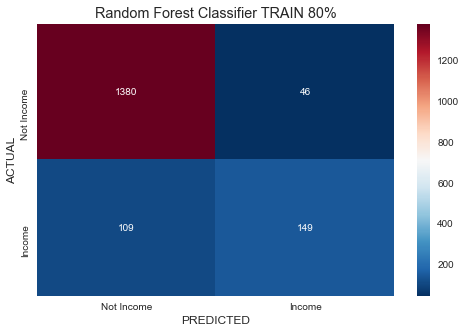

In [166]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax, cmap = 'RdBu_r')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

>We've done with the Random Forest, next we will store the report into report_RFC and moving to last model in this 80% Train data category.

In [167]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

### Decision Tree

> K-Nearest Neighbors is one of the most easy ML technique used. The logic behind KNN is to explore the data's nearest neighbor, assume the test datapoint to be similar to them and derive the output. In case of KNN classification, a majority voting is applied over the k nearest datapoints.

In [168]:
# confusion matrix for Decision Tree
cm_DTC = confusion_matrix(y_test, yp_DTC)
cm_DTC

array([[1297,  129],
       [ 102,  156]])

              precision    recall  f1-score   support

  Not Income       0.93      0.91      0.92      1426
      Income       0.55      0.60      0.57       258

    accuracy                           0.86      1684
   macro avg       0.74      0.76      0.75      1684
weighted avg       0.87      0.86      0.87      1684



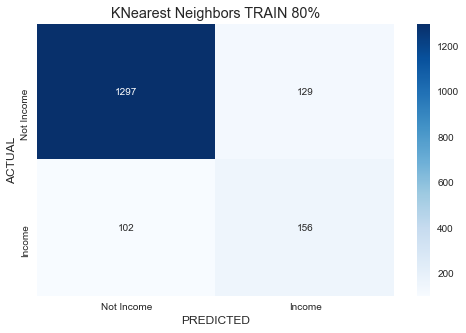

In [169]:
print(classification_report(y_test, yp_DTC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_DTC, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Alright, it seems that we've done all the modelling for our 80% Train category. Now I'll store the report in **report_KNN**. Then we move to the next category, the 90% Train data.

In [170]:
report_DTC = pd.DataFrame(classification_report(y_test, yp_DTC, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

> K-Nearest Neighbors is one of the most easy ML technique used. The logic behind KNN is to explore the data's nearest neighbor, assume the test datapoint to be similar to them and derive the output. In case of KNN classification, a majority voting is applied over the k nearest datapoints.

In [171]:
# confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[1424,    2],
       [ 240,   18]])

              precision    recall  f1-score   support

  Not Income       0.86      1.00      0.92      1426
      Income       0.90      0.07      0.13       258

    accuracy                           0.86      1684
   macro avg       0.88      0.53      0.53      1684
weighted avg       0.86      0.86      0.80      1684



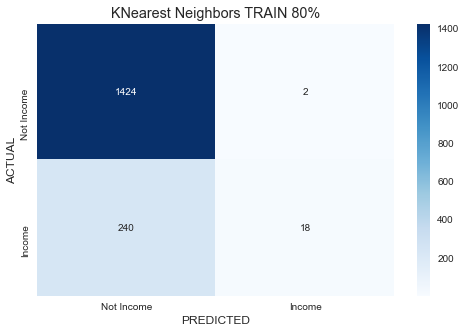

In [172]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

> Alright, it seems that we've done all the modelling for our 80% Train category. Now I'll store the report in **report_KNN**. Then we move to the next category, the 90% Train data.

In [173]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

>From default models above, we can see RandomForestClassifer has the best cross validation score and best model score with train & test data. Therefore, we choose it as our prediction model. Let's try tuning the hyperparameter to get the better result.

### Random Forest with Hyperparameter Tuning

Let's build a random forest classifier model with hyperparameter tuning

Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method. As mentioned, the tune process of Hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter version of each models.

### RANDOMSEARCHCV

In [197]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
rand_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                 "randomforestclassifier__min_samples_leaf":[1, 2, 4],
                 "randomforestclassifier__min_samples_split":[2, 5, 10],
                 "randomforestclassifier__n_estimators": [200, 400, 600, 800, 1000, 1400, 1800],
                 "randomforestclassifier__bootstrap": [True,False]}]
#Randomsearch of the pipeline, the fit the best model
randomsearch = RandomizedSearchCV(pipe, rand_param, cv=5, verbose=0,n_jobs=-1) # Fit random search
best_model = randomsearch.fit(X_train,y_train)

In [198]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=80,
                                        min_samples_leaf=2,
                                        n_estimators=1800))])
The mean accuracy of the model is: 0.9091448931116389


### Fitting all the parameters to the model

Let's fit all the parameters we derived by hyperparameter tuning into the actual model

In [200]:
rs = RandomForestClassifier(bootstrap=False, max_depth=80,
                                        min_samples_leaf=2,
                                        n_estimators=1800)
rs.fit(X_train,y_train)
y_pred = rs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9097387173396675


We have got 90.9% accuracy. Great!

### GRIDSEARCHCV

In [194]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

We have fitted the model by creating a list for all parameters and we will be evaluating based on cross validation

In [195]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=10,
                                        min_samples_leaf=15))])
The mean accuracy of the model is: 0.8972684085510689


We have got the best parameters for the model and the mean accuracy is 89.07%

### Fitting all the parameters to the model

Let's fit all the parameters we derived by hyperparameter tuning into the actual model

In [196]:
rt = RandomForestClassifier(max_leaf_nodes=10,min_samples_leaf=15)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9008313539192399


We have got 90% accuracy. Great!

### Splitting Data - Train 90%

> In general, the procedures on this category are pretty much the same as the 80% Train datas, the only difference is on this category we'll split the data into 90% Train and 10% Test data. Since the procedures are same, I would not explain the details as the explanations would also be repetitive and the same as above. 

In [174]:
df_90 = df_label.copy()

In [158]:
X1 = df_90.drop(columns = ['Revenue'])
y1 = df_90['Revenue'].values

In [159]:
X1.head()

,Weekend,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1,0,0,10,0,3,3,1,2,4,2,-0.726592,-0.222449,-0.245399,1.314522,1.309189,-0.325718
1,0,0,0,19,0,2,2,1,2,3,2,-0.726592,-0.222449,-0.940407,0.902051,-0.124090,-0.325718
2,0,0,0,3,2,2,4,1,2,2,2,-0.726592,-0.222449,-0.083132,-0.644714,-0.255886,-0.325718
3,0,0,0,3,0,1,1,3,2,3,2,-0.726592,-0.222449,-0.586821,-0.644714,2.248235,-0.325718
4,0,0,0,16,2,1,1,4,2,3,2,-0.726592,-0.222449,-0.568098,1.192070,-0.052426,-0.325718


#### FITTING MODEL

In [176]:
#Split Train 90%
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, train_size = 0.9, random_state = 42)

#Model
LRG1 = LogisticRegression().fit(X1_train, y1_train)
RFC1 = RandomForestClassifier().fit(X1_train, y1_train)
DTC1 = DecisionTreeClassifier().fit(X1_train, y1_train)
KNN1 = KNeighborsClassifier().fit(X1_train, y1_train)

#### HYPERPARAMETER

In [177]:
LRG1_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 100).fit(X1_train, y1_train)
RFC1_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 10).fit(X1_train, y1_train)
DTC1_best = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1).fit(X_train, y_train)
KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 39).fit(X1_train, y1_train)

In [183]:
# train

LRG1_score_tr = LRG1.score(X1_train,y1_train)
RFC1_score_tr = RFC1.score(X1_train,y1_train)
DTC1_score_tr = DTC.score(X1_train,y1_train)
KNN1_score_tr = KNN1.score(X1_train,y1_train)
LRG1_best_score_tr = LRG1_best.score(X1_train,y1_train)
RFC1_best_score_tr = RFC1_best.score(X1_train,y1_train)
DTC1_best_score_tr = DTC1_best.score(X1_train,y1_train)
KNN1_best_score_tr = KNN1_best.score(X1_train,y1_train)

In [184]:
# test

LRG1_score = LRG1.score(X1_test,y1_test)
RFC1_score = RFC1.score(X1_test,y1_test)
DTC1_score = DTC.score(X1_train,y1_train)
KNN1_score = KNN1.score(X1_test,y1_test)
LRG1_best_score = LRG1_best.score(X1_test,y1_test)
RFC1_best_score = RFC1_best.score(X1_test,y1_test)
DTC1_best_score = DTC1.score(X1_train,y1_train)
KNN1_best_score = KNN1_best.score(X1_test,y1_test)

In [186]:
model90_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG1_score_tr, RFC1_score_tr, DTC1_score_tr, KNN1_score_tr],
                                   'Hyper' : [LRG1_best_score_tr, RFC1_best_score_tr, DTC1_best_score_tr, KNN1_best_score_tr]})

In [187]:
model90_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
                                   'Normal': [LRG1_score, RFC1_score, DTC1_score, KNN1_score],
                                   'Hyper' : [LRG1_best_score, RFC1_best_score, DTC1_best_score, KNN1_best_score]})

In [188]:
pd.concat([model90_train_score, model90_test_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.893451  0.893847
            1   RandomForest  0.999868  0.953921
            2   DecisionTree  0.985873  0.986005
            3    KNNeighbors  0.883153  0.850409
Test Score  0  LogRegression  0.894299  0.895487
            1   RandomForest  0.902613  0.900238
            2   DecisionTree  0.985873  1.000000
            3    KNNeighbors  0.855107  0.853919

> Note that in this category, we can also see that the model are overfitting. I'll try to use cross validation once again.

In [189]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)
LRG1_kfold = cross_val_score(LRG_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
RFC1_kfold = cross_val_score(RFC_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
DTC1_kfold = cross_val_score(DTC_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')
KNN1_kfold = cross_val_score(KNN_best, X1_train, y1_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'LRG Kfold cross-val' : LRG1_kfold.tolist(),
              'RFC Kfold cross-val' : RFC1_kfold.tolist(),
              'DTC Kfold cross-val' : DTC1_kfold.tolist(),
              'KNN Kfold cross-val' : KNN1_kfold.tolist()})

,LRG Kfold cross-val,RFC Kfold cross-val,DTC Kfold cross-val,KNN Kfold cross-val
0,0.871287,0.913531,0.867987,0.846865
1,0.882508,0.911551,0.867987,0.846205
2,0.873267,0.907591,0.859406,0.849505
3,0.875248,0.912871,0.867987,0.841584
4,0.876486,0.906209,0.875826,0.846103


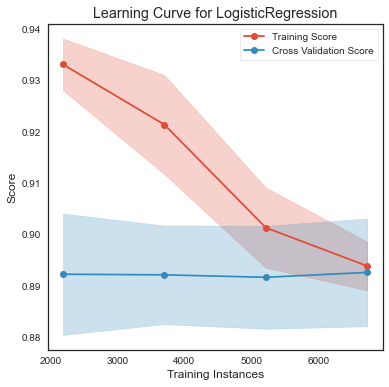

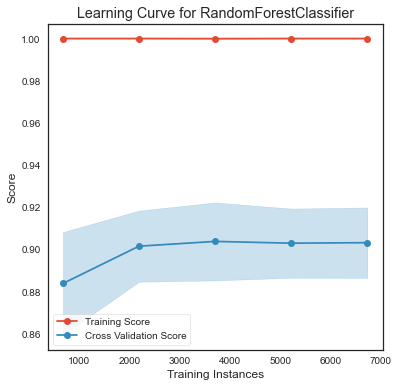

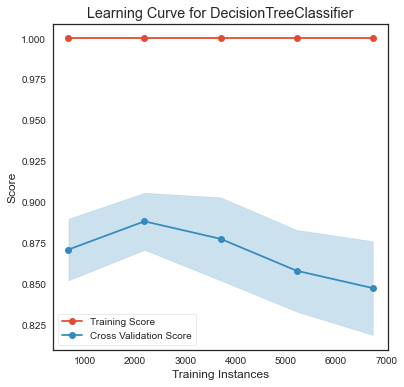

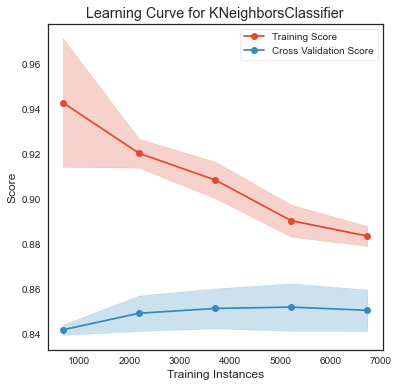

In [190]:
curve = [LRG1, RFC1, DTC1, KNN1]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

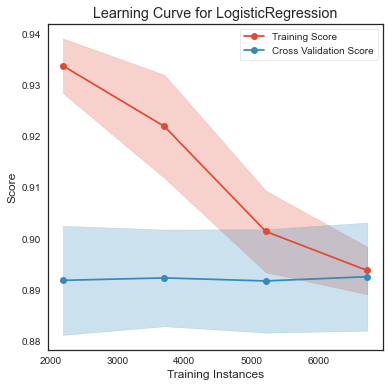

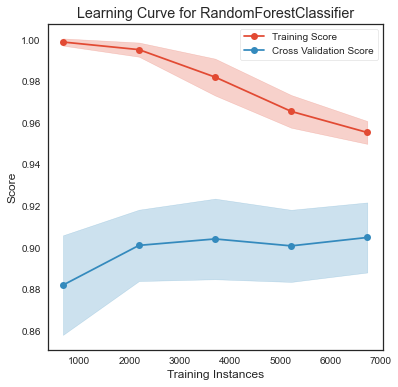

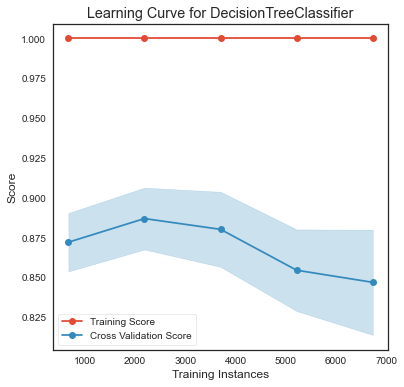

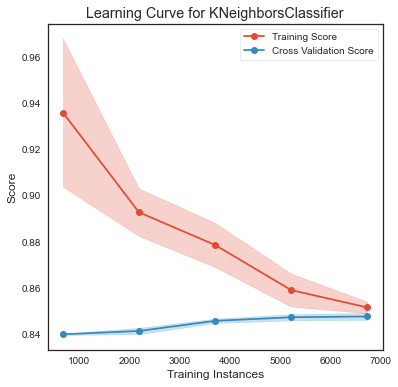

In [191]:
curve = [LRG1_best, RFC1_best, DTC1_best, KNN1_best]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

In [192]:
pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'DecisionTree', 'KNNeighbors'], 
              'Normal': [LRG1_score_tr, RFC1_score_tr, DTC1_score_tr, KNN1_score_tr],
              'Kfold ': [LRG1_kfold.mean(), RFC1_kfold.mean(), DTC1_kfold.mean(), KNN1_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.893451,0.875759
1,RandomForest,0.999868,0.910351
2,DecisionTree,0.985873,0.867838
3,KNNeighbors,0.883153,0.846052


> From `learning_curve()` and the mean Kfold above, we can see that there are clearly overfitting on Random Forest as well as on KNN model, but on KNN it's only slightly. But let's continue to see the model prediction and model evaluation.

#### PREDICT

In [193]:
#Logistic Regression
yp_LRG1 = LRG1_best.predict(X1_test)

#Random Forest
yp_RFC1 = RFC1_best.predict(X1_test)

#Decision Tree
yp_DTC1 = DTC1_best.predict(X1_test)

#KNNeighbors
yp_KNN1 = KNN1_best.predict(X1_test)

### MODEL PERFORMANCE EVALUATION

### Logistic Regression

In [203]:
# confusion matrix for LogisticRegression
cm_LRG1 = confusion_matrix(y1_test, yp_LRG1)
cm_LRG1

array([[690,  20],
       [ 68,  64]])

              precision    recall  f1-score   support

  Not Income       0.91      0.97      0.94       710
      Income       0.76      0.48      0.59       132

    accuracy                           0.90       842
   macro avg       0.84      0.73      0.77       842
weighted avg       0.89      0.90      0.89       842



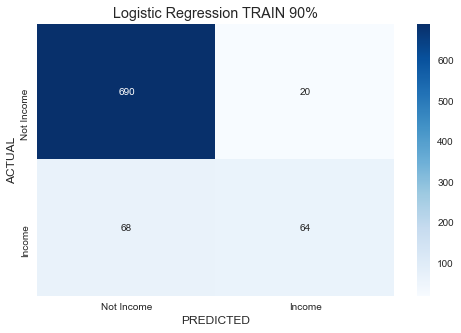

In [204]:
print(classification_report(y1_test, yp_LRG1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [205]:
report_LRG1 = pd.DataFrame(classification_report(y1_test, yp_LRG1, target_names= labels, output_dict=True)).T

### Random Forest Classifier

In [206]:
# confusion matrix for RandomForestClassifier
cm_RFC1 = confusion_matrix(y1_test, yp_RFC1)
cm_RFC1

array([[679,  31],
       [ 53,  79]])

              precision    recall  f1-score   support

  Not Income       0.93      0.96      0.94       710
      Income       0.72      0.60      0.65       132

    accuracy                           0.90       842
   macro avg       0.82      0.78      0.80       842
weighted avg       0.89      0.90      0.90       842



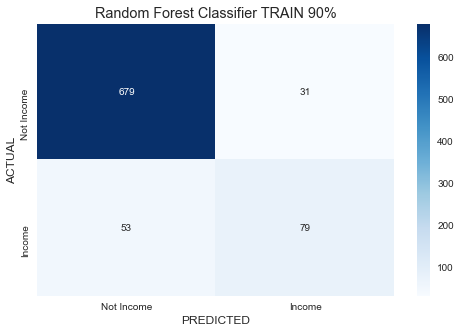

In [207]:
print(classification_report(y1_test, yp_RFC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [208]:
report_RFC1 = pd.DataFrame(classification_report(y1_test, yp_RFC1, target_names= labels, output_dict=True)).T

### Decision Tree

In [209]:
# confusion matrix for DecisionTree
cm_DTC1 = confusion_matrix(y1_test, yp_DTC1)
cm_DTC1

array([[643,  67],
       [ 54,  78]])

              precision    recall  f1-score   support

  Not Income       0.92      0.91      0.91       710
      Income       0.54      0.59      0.56       132

    accuracy                           0.86       842
   macro avg       0.73      0.75      0.74       842
weighted avg       0.86      0.86      0.86       842



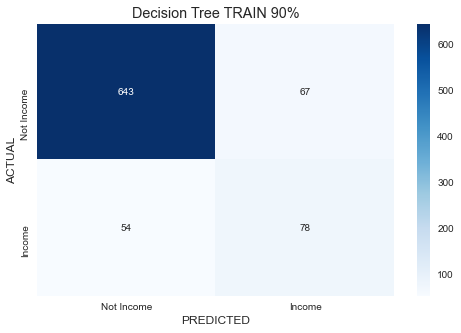

In [210]:
print(classification_report(y1_test, yp_DTC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_DTC1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Decision Tree TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [214]:
report_DTC1 = pd.DataFrame(classification_report(y1_test, yp_DTC1, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

In [211]:
# confusion matrix for KNN
cm_KNN1 = confusion_matrix(y1_test, yp_KNN1)
cm_KNN1

array([[709,   1],
       [122,  10]])

              precision    recall  f1-score   support

  Not Income       0.85      1.00      0.92       710
      Income       0.91      0.08      0.14       132

    accuracy                           0.85       842
   macro avg       0.88      0.54      0.53       842
weighted avg       0.86      0.85      0.80       842



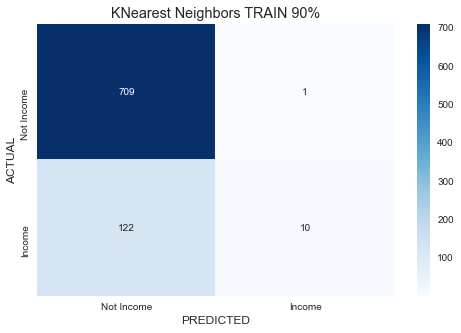

In [212]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 90%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [213]:
report_KNN1 = pd.DataFrame(classification_report(y1_test, yp_KNN1, target_names= labels, output_dict=True)).T

### Random Forest with Hyperparameter Tuning

### RANDOMSEARCHCV

In [215]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
rand_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                 "randomforestclassifier__min_samples_leaf":[1, 2, 4],
                 "randomforestclassifier__min_samples_split":[2, 5, 10],
                 "randomforestclassifier__n_estimators": [200, 400, 600, 800, 1000, 1400, 1800],
                 "randomforestclassifier__bootstrap": [True,False]}]
#Randomsearch of the pipeline, the fit the best model
randomsearch = RandomizedSearchCV(pipe, rand_param, cv=5, verbose=0,n_jobs=-1) # Fit random search
best_model = randomsearch.fit(X1_train,y1_train)

In [217]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X1_test,y1_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1400))])
The mean accuracy of the model is: 0.8978622327790974


### Fitting all the parameters to the model

In [221]:
rs = RandomForestClassifier(bootstrap=False, max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1400)
rs.fit(X1_train,y1_train)
y1_pred = rs.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.9038004750593824


### GRIDSEARCHCV

In [ ]:
# Create a pipeline
pipe = make_pipeline((RandomForestClassifier()))
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]
#Gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X1_train,y1_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X1_test,y1_test))

### Fitting all the parameters to the model

In [ ]:
rt = RandomForestClassifier(bootstrap=False, max_depth=30,
                                        min_samples_split=10,
                                        n_estimators=1400)
rs.fit(X1_train,y1_train)
y1_pred = rs.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))